In [5]:
from pathlib import Path
file = Path("article_json_author") / "novinky.json"

In [14]:
from article_utils import create_df
df = create_df(file)
df.Name = "novinky"

In [13]:
df.describe()

,article length,headline length,brief length,num words,num words ratio,num words per line,avg word length,non-alpha,non-alpha ratio
count,421431.000000,421431.000000,420906.000000,421431.000000,421431.000000,421431.000000,421431.000000,421431.000000,421431.000000
mean,1550.858383,54.385525,276.509572,263.087839,0.168106,39.203082,5.109954,40.914724,0.023880
std,1540.733623,15.257251,72.124663,269.832163,0.014934,48.516864,0.564703,45.324163,0.010214
min,4.000000,1.000000,1.000000,1.000000,0.062500,1.000000,1.800000,0.000000,0.000000
25%,703.000000,44.000000,225.000000,118.000000,0.160494,27.030331,4.815135,17.000000,0.020796
50%,1204.000000,54.000000,274.000000,202.000000,0.167534,35.250000,5.066667,30.000000,0.024862
75%,1988.000000,65.000000,326.000000,334.000000,0.175340,43.333333,5.324247,52.000000,0.028975
max,47633.000000,147.000000,1308.000000,7517.000000,0.428571,3342.000000,16.000000,1371.000000,0.239316


In [15]:
# cut 1800 article
df_date = df.sort_values("date")
for i in df_date[0:4]["url"]:
    print(i)

df_date_asc = df.sort_values("date", ascending=False)
print("asc")
for i in df_date_asc[0:4]["url"]:
    print(i)

df = df[df["date"] > df_date["date"].iloc[0]]
df.Name = "novinky"

https://www.novinky.cz/kultura/294505-jeste-nikdy-nebyl-cukr-tak-sladky-jako-dnes.html
https://www.novinky.cz/domaci/2-boj-o-hrad-znovu-zacal.html
https://www.novinky.cz/domaci/10-mrznouci-dest-lamal-stromy-a-trhal-elektricke-draty.html
https://www.novinky.cz/domaci/clanek/silnicari-bojuji-se-snehem-a-ledem-40121372
asc
https://www.novinky.cz/krimi/clanek/desetileta-divka-z-milovic-se-nevratila-ze-skoly-40401090
https://www.novinky.cz/historie/clanek/osudna-vysilacka-dva-tydny-po-lidicich-naciste-vyhladili-i-osadu-lezaky-40401036
https://www.novinky.cz/domaci/clanek/poslanci-v-prvnim-kole-podporili-konec-eet-40401091
https://www.novinky.cz/domaci/clanek/drony-z-ceska-by-mohly-hlidat-hranici-unie-40400978


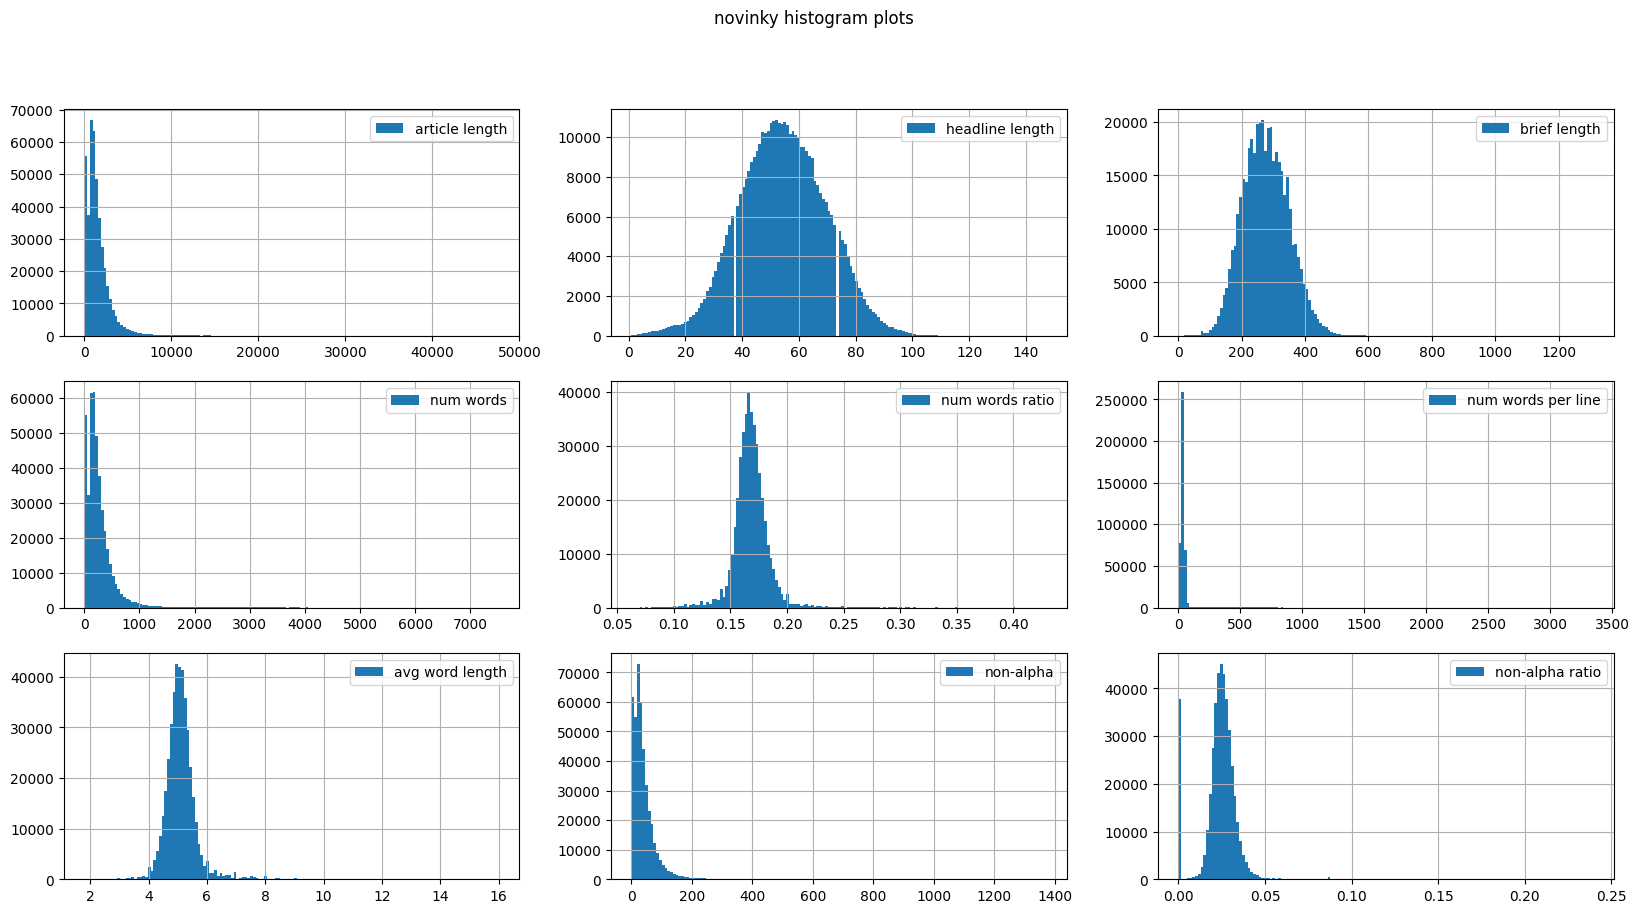

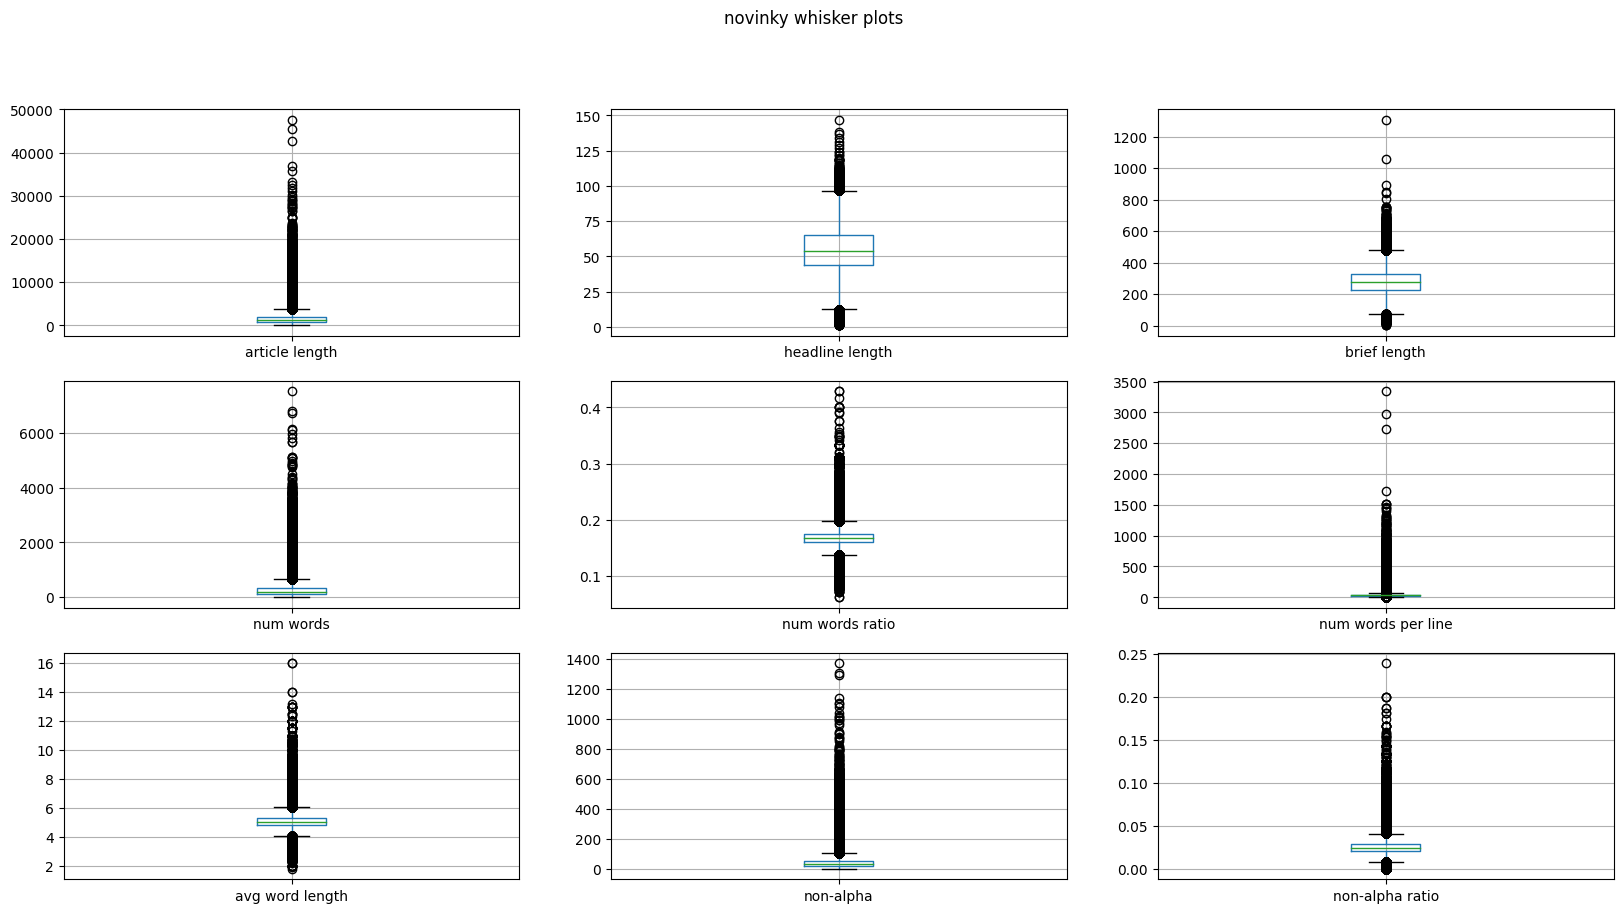

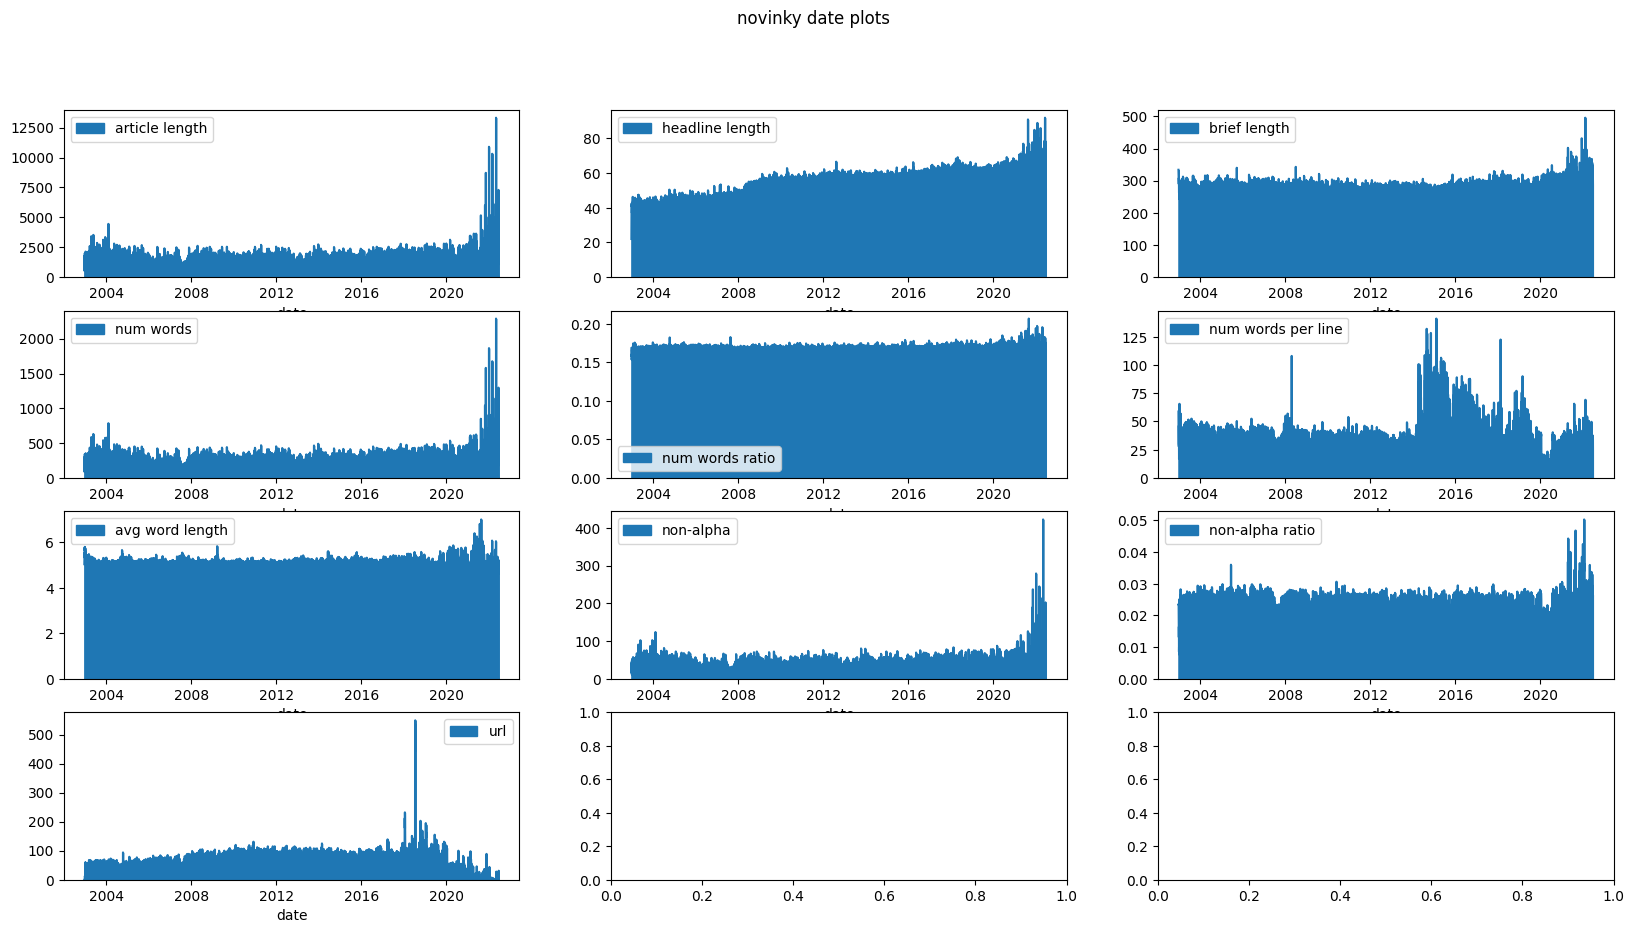

In [19]:
from article_utils import create_exploratory_plots
create_exploratory_plots(df,save=True)

In [20]:

from preprocess_utils import show_outlier_by_percentiles, show_df_lines, show_outliers, pick_indexes
col = "headline length"
headline_mod = lambda x: x["headline"]

df_tmp = show_outlier_by_percentiles(df, col, 0.999, limit=20)
show_df_lines(df_tmp, file, headline_mod)
# Okayage

Filmové premiéry: Daleko od hlučícího davu, Slow West, Terminátor Genisys a Evangelium podle Brabence
Dozvuky CeBITu: ESET představil preview nové verze ESET Smart Security. Debatu ovládl cloud computing
Životní styly přelomu dvou etap. Na konci roku vyšla publikace Kmeny 90. Vzpomíná, ale ne nostalgicky
Terminátor, pauzy na čůrání, Babiš uškrcený na pupeční šňůře. Přečtěte si perličky z jednání Sněmovny
Babiš měl vulgárně odbýt dívku žádající podpis na Kmentovu knihu. Řekl jsem sorry jako, tvrdí premiér
Kdo by se s noblesou staral o dementní pokálené starce? Lídr ČSSD Kajnar vysvětluje sociální politiku
Velitel čs. jednotky v Pouštní bouři Ján Valo: Neuhnuli jsme a spojenci to ocenili. Doma to bylo jiné
Scenárista Petr Kolečko: My Češi si často myslíme, že jsme rasisti, ale v životě se pak chováme jinak
Studentka si našla odvoz na sociální síti. Řidič ji omámil a zřejmě znásilnil, pak spáchal sebevraždu
Spěchala vyzvednout děti ze školy, ale už je nikdy nespatří. Oběť teroristy byla u

In [49]:

df_tmp = show_outliers(df, col, 20, "lower", limit=10, random=False)
show_df_lines(df_tmp, file, headline_mod)

# Shows that we shouldn have split by -

HRA: Silver Knights
Problémy s motivací
HRA: Cirque de Zale
Kocáb zaplatil dluh
Nový mrav, nová éra
Nova odepsala Kotel
Rio patří karnevalu


KeyboardInterrupt: 

In [75]:
col = "headline length"
df_tmp = df.groupby(col).count()
mins = df_tmp[df_tmp["url"] < 500]
# No idea why there are holes in plot they are not in column :/
df_tmp[68:80]

,url,article length,brief length,num words,num words ratio,num words per line,avg word length,non-alpha,non-alpha ratio,date,comments_num
headline length,,,,,,,,,,,
69,6887,6887,6878,6887,6887,6887,6887,6887,6887,6887,0
70,6717,6717,6706,6717,6717,6717,6717,6717,6717,6717,0
71,6290,6290,6289,6290,6290,6290,6290,6290,6290,6290,0
72,6061,6061,6055,6061,6061,6061,6061,6061,6061,6061,0
73,5576,5576,5575,5576,5576,5576,5576,5576,5576,5576,0
74,5290,5290,5284,5290,5290,5290,5290,5290,5290,5290,0
75,4811,4811,4808,4811,4811,4811,4811,4811,4811,4811,0
76,4630,4630,4630,4630,4630,4630,4630,4630,4630,4630,0
77,4033,4033,4031,4033,4033,4033,4033,4033,4033,4033,0


In [22]:
df_tmp = df.sort_values(col, ascending=False)
show_df_lines(df_tmp[0:1], file, headline_mod)

Filmový výběr Salonu (MFDF Ji.hlava): Sólo, Antropocén: Epocha člověka, Soud nad českou cestou, Ztracený břeh, Skutok sa stal a Smrt pana Lazaresca


Zemřela zpěvačka Horká, která se cíleně nakazila virem. Jste odpad, vzkázal syn lidem zpochybňujícím vakcínu
Vědci zkoumali Michelangelovy boty. Obří stopy, které zanechal v umění, učinila překvapivě malá osoba
Inflace snižuje ceny, chlubila se na sítích ministryně financí Schillerová. Druhý den nesmysl opravila
Týden otevřených zelených střech je inspirací pro všechny, kdo chtějí z bydlení ve městě vytěžit maximum
Velitel čs. jednotky v Pouštní bouři Ján Valo: Neuhnuli jsme a spojenci to ocenili. Doma to bylo jiné
Nevíte si rady s financemi? Půjčka na zkoušku vám dá klid a jistotu. A možnost si své rozhodnutí rozmyslet
Nejlepším rodinným domem v České ceně za architekturu je letos Lazy House s krásnými výhledy do okolí
Kód pro přednostní očkování vyprší učitelům v neděli. Po Velikonocích dojde řada na seniory nad 65 let
Jeden má za komentář chválící teror podmínku, druhý 6 let natvrdo. Propastný rozdíl kritizují právníci
Nespokojení středoškoláci založili odboj. Nechceme nikoho svrhno

KeyboardInterrupt: 

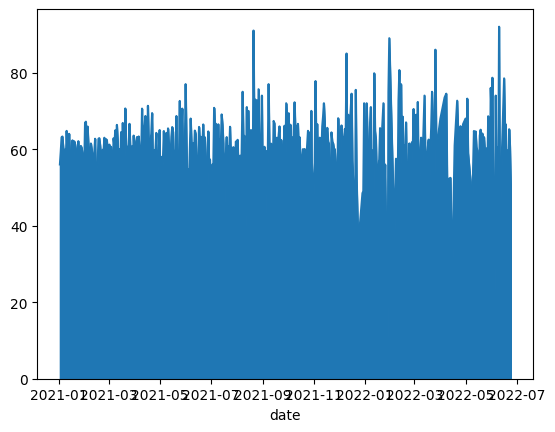

In [51]:

from datetime import datetime
df_tmp = df
df_tmp = df_tmp[(df_tmp["date"] > datetime(2021, 1, 1).date()) & (df_tmp["date"] < datetime(2026, 1, 1).date())]
df_tmp.groupby("date")[col].mean().plot.area()


lines = df_tmp.sort_values(col, ascending=False).head(20)
show_df_lines(lines, file, headline_mod)
df_tmp.describe()

array([[<AxesSubplot:title={'center':'article length'}>]], dtype=object)

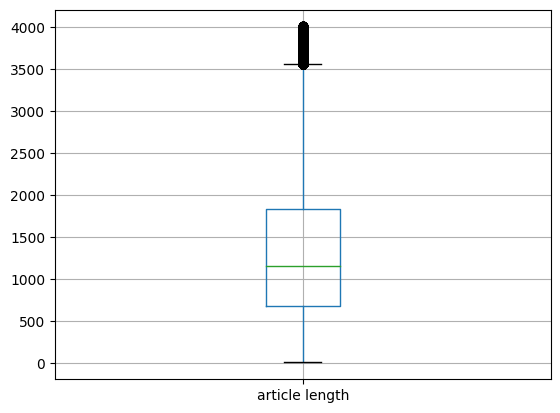

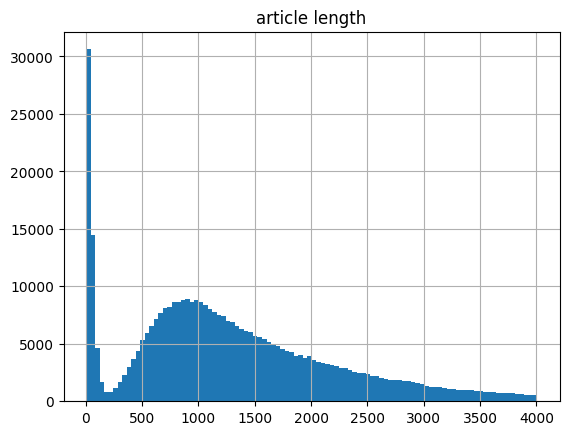

In [24]:

import numpy as np
# ARTICLE LENGTH
#show_df_lines(df_art, file, mod)
col = "article length"
# Long articles -> podcast transcript
df_art = df[df[col] < np.quantile(df[col], 0.95)]
df_art.boxplot(column=col)
df_art.hist(column=col, bins=100)


In [80]:
col = "article length"
df_art = show_outliers(df,col, 40000, "higher", limit=5)

content_mod = lambda art : art["url"] + "\n" + art["content"] + "\n---------------\n"
show_df_lines(df_art, file, content_mod)

https://www.novinky.cz/specialy/dokumenty/96921-dokument-programove-prohlaseni-vlady.html
I. Preambule
Vláda České republiky v čele se svým předsedou Mirkem Topolánkem si uvědomuje složitou politickou situaci v naší zemi, která je důsledkem nejednoznačného volebního výsledku. Občanská demokratická strana jako vítězná strana v červnových volbách proto předkládá Poslanecké sněmovně i české veřejnosti programové prohlášení vlády, jejíž časový mandát bude omezen na dobu devíti měsíců do předčasných voleb, které jako jediné mohou vrátit zemi stabilní politické prostředí, vyřešit neprůchodnost Poslanecké sněmovny a přinést nové vládě jasný mandát od občanů k dalšímu směřování politického vývoje v České republice.
Vláda bude přesto ctít zásady parlamentní demokracie a plně sloužit zájmům naší země a potřebám jejích obyvatel i v časově omezeném mandátu. Aby se zablokování Poslanecké sněmovny již nemohlo opakovat, vláda předloží návrh ústavního zákona, který sníží počet poslanců ve Sněmovně o j

https://www.novinky.cz/domaci/clanek/dorucovaci-sluzby-se-pripravuji-na-vanocni-shon-letos-bude-rekordni-40343588
Češi letos utratí na internetu zhruba 200 miliard
---------------

https://www.novinky.cz/sport/clanek/zelezny-se-chce-na-zlate-tretre-vytahnout-259951
Ostrava je srdeční záležitostí
Ať se Makarov bojí
---------------

https://www.novinky.cz/kultura/clanek/pribeh-lasky-z-terezina-v-podani-dagmar-hilarove-159348
Kniha nabízí bezprostřední dojmy
Literární krádež
---------------

https://www.novinky.cz/krimi/clanek/soud-zmirnil-trest-zene-ktera-odhodila-novorozene-do-kontejneru-230708
Dítě přežilo náhodou
Pupeční šňůru přetrhla rukou
---------------

https://www.novinky.cz/domaci/clanek/v-mlade-boleslavi-chybeji-straznici-mesto-jim-najalo-kolegy-z-bezpecnostni-agentury-40298314
Přestupky páchají podle primátora zejména cizinci
---------------

https://www.novinky.cz/domaci/clanek/lide-z-horomeric-se-vystehovat-nechteji-u-domu-postavili-zavoru-339986
Lidé verdikt odmítají
Babiš

<AxesSubplot:xlabel='date'>

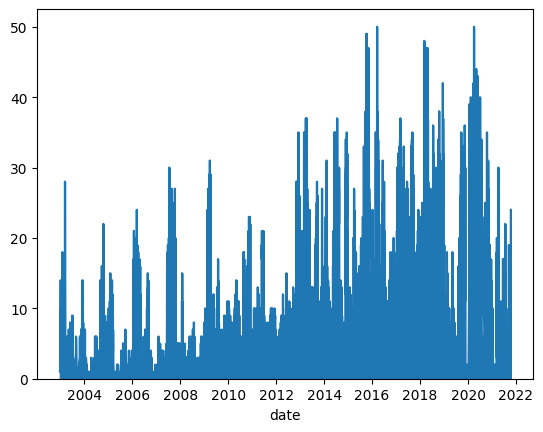

In [59]:
from preprocess_utils import show_outliers
df_art = show_outliers(df,col, 50, "lower", limit=10, random=False)
show_df_lines(df_art, file, content_mod)
df_art = df[df["article length"] < 200].groupby("date")["article length"].count()
df_art.plot.area()

In [60]:
import pandas as pd
df_article = df
df_article = df_article[df_article["date"] > datetime(2021, 1, 1).date()]
df_article = df_article.pivot_table(index="date", values="article length", aggfunc="mean")
outlier =show_outlier_by_percentiles(df_article,col, 0.99, limit=5)
max_date = df_article.idxmax().values[0]
max_date  = pd.to_datetime(max_date).date()
x =df[df["date"] == max_date]
x_sorted =x.sort_values(col, ascending=False)
for x in x_sorted[0:1]["url"]:
    print(x)

# Eh it's is truly freaking long
show_df_lines(outlier, file, content_mod)



https://www.novinky.cz/historie/clanek/vaclav-moravek-vrahum-sel-naproti-40391927


In [61]:
# Word length

col = "avg word length"
df_word = show_outliers(df,col, 6.5, "higher", limit=5)
# shows 
show_df_lines(df_word, file, content_mod)

https://www.novinky.cz/vase-zpravy/clanek/dve-kapely-dnes-zahraji-v-breclavskem-klubu-kafe-piksla-40267386
Nikander se břeclavskému publiku představí poprvé. Nejsou to však žádní nováčci. Mají za sebou desítky koncertů po klubech a festivalech a hrají sludge metal. Těžké kytarové riffy, drtivá basa a ječák, ze kterého mrazí. Přijďte se přesvědčit.
Zahrají také Safety First z Uherského Hradiště. Kapela předvede dokonalou geometrii, symetrii, rytmické opakování a ubíhající perspektivu. Post rock říznutý math rockem v podání šohajů ze Slovácka.
Další informace: https://www.facebook.com/events/271955940345847
Informace o kapelách: www.nikander.bandcamp.com; https://bandzone.cz/safetyfirst
---------------

https://www.novinky.cz/krimi/234335-spolujezdec-v-osobnim-aute-neprezil-celni-srazku-s-kamionem.html
Další dva lidé byli zraněni těžce a lehce, oznámilo Centrum dopravních informací.
Komunikace byla uzavřena pro veškerou dopravu. Obousměrná objížďka byla nasměrována přes Třebechovice pod 

In [62]:


df_word = show_outliers(df,col, 4,  "lower", limit=5, random=False)
show_df_lines(df_word, file, content_mod)


https://www.novinky.cz/kultura/264630-francouzsti-umelci-abel-a-gordonova-velkou-inspiraci-nam-byl-bolek-polivka.html
Fiona hraje ženu, která jednoho dne do hotelu přichází, aby mu řekla, že je víla, která mu splní tři přání. O to třetí, nevyřčené, a také o lásku jde v jejich filmu především. Sešla jsem se s nimi sice v mrazivé Paříži, ale v teple luxusního hotelu Grand – Intercontinental, a moje první otázka byla nasnadě:
Jaké máte vy dva své třetí přání?
FG: To se přece nesmí vyslovit. To by bylo kouzlo porušeno. Víla by zmizela.
DA: Ale ono se ani to první netýká peněz a luxusu, jaký vidíme třeba tady kolem sebe. Jde o to, že to nejcennější je čas, který nám byl na tomto světě vyměřen, a musíme s ním správně naložit. Každý ví, že jenom s penězi by nebyl šťastný, a přece se za nimi většina lidí žene. Proto je pointa filmu v tom, že Dom žádné přání nevysloví. Oba si budou přát jen ten čas, protože to je to, co potřebují.
Oba jste původem divadelníci a velmi úspěšní. Co vás přivedlo za

In [64]:
# Word num

col = "num words ratio"
mod = lambda art : art["content"]
df_word = show_outliers(df,col, 0.22, "higher", limit=10, random=False)
show_df_lines(df_word, file, content_mod)

https://www.novinky.cz/domaci/clanek/odmeny-volebnim-komisarum-se-nezvysily-uz-osm-let-355418
Za druhé kolo jen 200 korun
Může se zvýšit až na 2600 korun
---------------

https://www.novinky.cz/kultura/clanek/na-grammy-ma-letos-nejvic-sanci-beyonce-dua-lipa-a-swiftova-40343231
Se singlem Black Parade by Beyoncé teoreticky mohla uspět až čtyřikrát (Nahrávka roku, Píseň roku a R&B výkon a R&B píseň. Díky spolupráci s Megan Thee Stallion (Savage) má další šanci na Nahrávku roku, na Rapový výkon a Rapovou píseň. Navíc figuruje ještě v kategoriích Hudební film roku za Black Is King a Videoklip roku za Brown Skin Girl.
Dua Lipa také kandiduje v kategoriích Nahrávka roku a Píseň roku (Don’t Start Now) i Album roku (Future Nostalgia). Také Swiftová byla nominována v nejdůležitějších kategoriích (Píseň roku Cardigan, Album roku Folklore).
O Album roku se uchází také Jhené Aiko (Chilombo), deluxe edice eponymního debutu Black Pumas, Coldplay (Everyday Life), Jacob Collier (Djesse Vol. 3), Haim (

In [32]:

df_word = show_outliers(df,col, 0.11, "lower", limit=10)
mod = lambda art : art["content"]
show_df_lines(df_word, file, content_mod)


https://www.novinky.cz/internet-a-pc/software/clanek/windows-7-jsou-pro-microsoft-stale-milionovy-byznys-40312519
Prodloužení podpory místo nového počítače
Nepodporované systémy představují riziko
---------------

https://www.novinky.cz/zahranicni/evropa/clanek/evropane-zacinaji-travit-dovolenou-doma-40125251
Cestovní kanceláře se přizpůsobily
Mládež upřednostňuje ekologické pobyty
---------------

https://www.novinky.cz/domaci/clanek/havel-na-lany-nezapomene-246879
Přípitek dovezenou slivovicí
Lány pod drobnohledem
Prezidentské stěhování
---------------

https://www.novinky.cz/zena/zdravi/clanek/masaze-ulevi-telu-a-povzbudi-mysl-24637
Medová detoxikační
Čokoládová
Lávové kameny
Tanamera
Ajurvédská
Baňkování
---------------

https://www.novinky.cz/kariera/clanek/padesatnici-se-nepovazuji-za-technicky-menecenne-267883
Nejsou důležitými zákazníky
Používají mobilní aplikace
Vyvarovat se blahosklonného přístupu
---------------

https://www.novinky.cz/zahranicni/evropa/clanek/ukrajinsky-pre

In [65]:
# BRIEF INSPECTION
col = "brief length"
df_tmp = show_outlier_by_percentiles(df,col, 0.999, limit=10)
mod_brief = lambda x: x["url"] + "\n" + x["brief"] + "\n---------------\n "
show_df_lines(df_tmp, file, mod_brief)

In [34]:

df_tmp = show_outliers(df,col, 20, "lower", limit=20, random=False)
show_df_lines(df_tmp, file, mod_brief)


https://www.novinky.cz/kultura/salon/206031-fejeton-venduly-a-jiriho-kubalikovych-varanasi.html:
You like India?
---------------
 
https://www.novinky.cz/kultura/salon/224549-fejeton-mariana-pally-nedychej.html:
Začal jsem opatrně.
---------------
 
https://www.novinky.cz/kultura/salon/310276-fejeton-mariana-pally-tutani.html:
Nic se nemusí umět.
---------------
 
https://www.novinky.cz/komercni-clanky/53726-vratte-se-domu-ve-zdravi.html:
Žloutenky
---------------
 
https://www.novinky.cz/komentare/clanek/komentar-valka-vaclav-klaus-ml-293296:
...se blíží.
---------------
 
https://www.novinky.cz/odlozna/102385-medove-pernicky.html:
Pravé kouzlo Vánoc
---------------
 
https://www.novinky.cz/odlozna/103411-spenatovy-dip-v-bochniku.html:
Inspirujte se..
---------------
 
https://www.novinky.cz/kultura/salon/222346-vaclav-belohradsky-cas-dluhu.html:
Co jsou dluhy?
---------------
 
https://www.novinky.cz/komercni-clanky/27120-limit-900-000-kc-reseni.html:
.
---------------
 
https://www.

In [72]:
col = "non-alpha ratio"
df_tmp = show_outliers(df,col, 0.06, "higher", limit=10)
show_df_lines(df_tmp, file, content_mod)
import numpy as np

https://www.novinky.cz/zena/styl/156266-obrazem-originalni-darek-na-posledni-chvili.html
:.Chiyu – smaragdově-zelený top ze 100% přírodního hedvábí s malovaným ornamentem. Top tvoří jeden celek s dlouhým hedvábným šálem (130x35 cm). Na zádech je jednoduché šněrování hedvábnou stužkou. Top je velmi jemný, lehký, příjemný na tělo a krásně sedí.foto: atelierchae / Fler.cz
:.Originální kabelka z pravého hedvábí tzv. Geisha styl. Ručně dělaná, dovezená z Japonska.foto: Aukro.cz/Bux_4me
:.Obrázek víno - decoupage. Originální ruční práce, rámeček zdobený krakelováním a ubrousky, korkem. Popraskání laku je pokaždé jiné. Rozměry: 260x260 mm. Cena: 199 Kčfoto: Mimibazar.cz/magdisma
:.Kocourek na hraní - Polštář 40x40 cm, snímací bavlněný potah. Text: Pojď si hrát, pojď se smát,chci ti říct-mám tě rád! Cena: 399 Kč foto: Ivka-Lehkoživka / Flér.cz
:.Dřevěné ručně malované fotorámečky s vyřezanou ozdobou. Lze je zavěsit i postavit. V rámečku je čirá plastová destička (není vidět) a fotka je chráněn

https://www.novinky.cz/kultura/406019-festivaly-2016-underworld-the-offspring-tom-jones-jake-bugg-a-dalsi.html
Votvírák
10.–12. června, letiště Milovice
Hrají: Kryštof, Chinaski, Richard Müller, Arakain, Harlej, Mandrage, Minus123minut, Mandrage, UDG a další
Vstupné: 350 Kč
Aerodrome
15. června, Tipsport Arena Praha
Hrají: Korn, Bring Me The Horizon, Billy Talent, Bad Religion a další
Vstupné: 1490 Kč
Broumovská kytara
18. června, areál Dětské hřiště, Broumov
Hrají: Kamil Střihavka a Leaders!, Imodium, Pavel Callta, Cocotte Minute, Pumpa, Volant, Vivien, Liguére a další
Vstupné: 200 Kč
Open Air Musicfest Přeštěnice
23.–26. června, Přeštěnice
Hrají: Kryštof, No Name, Visací zámek, Monkey Business, Wohnout, Sabina, Stroy a další
Vstupné: 690 Kč
Jake Bugg se představí na přehlídce Trutnoff.
FOTO: Petr Hloušek, Právo
United Islands Of Prague
23.–26. června, Praha
Hrají: Brodka, L’Aupaire, Leyya, The Splendor, Maella, VR/Nobody, Vltava, Vees a další
Vstupné: zdarma
Prague Metronome Festival

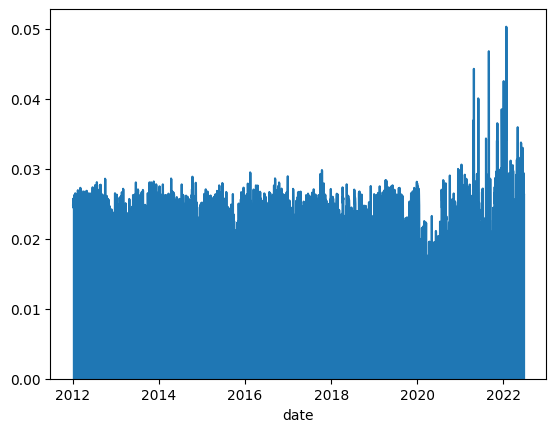

In [73]:
from datetime import datetime
df_tmp = df
df_tmp = df_tmp[(df_tmp["date"] > datetime(2012, 1, 1).date())]
df_tmp.groupby("date")[col].mean().plot.area()
out = show_outliers(df_tmp,col, 0.08, "higher", limit=5, random=False)
show_df_lines(out, file, content_mod)



In [39]:
# num words per line
col = "num words per line"
df_tmp = show_outliers(df,col, 40, "higher", limit=10)
mod = lambda art : art["content"] + "\n---------------\n"
show_df_lines(df_tmp, file, mod)

Hnutí ANO kritizovalo zdravotnictví, bralo ho jako černou díru na peníze. Jak to chcete změnit? Chystáte ekonomické a personální změny v nemocnicích?
Na ministerstvo jsem přišel s cílem, že to chci změnit. Podle mého názoru je především nutné resort zdravotnictví otevřít, zprůhlednit a posílit postavení pacienta v celém systému. Chci, aby resort a jeho přímo řízené nemocnice začaly zveřejňovat data o svém hospodaření a veřejnost tak věděla, na co se vynakládají peníze. Plýtvání veřejných prostředků by měly také zamezit centrální nákupy léků a ostatních materiálů založených na nejlepším poměru ceny a kvality.
FOTO: koláž Novinky.cz s použitím Právo, ČTK, psp.cz a Středočeský kraj
U přímo řízených nemocnic je podle mého názoru nutné zavést jasná pravidla pro zpětné bonusy, které také považuji za problematické. Nyní se plánuji detailně seznámit s hospodařením přímo řízených nemocnic. Hovořit o personálních změnách je tedy zatím předčasné, ale pokud daná zjištění nebudou uspokojivá a budou

array([[<AxesSubplot:title={'center':'num words per line'}>]],
      dtype=object)

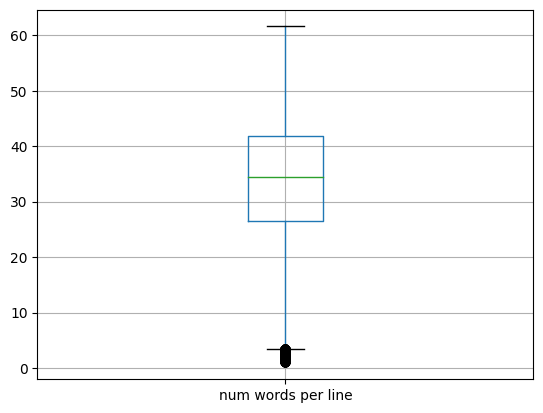

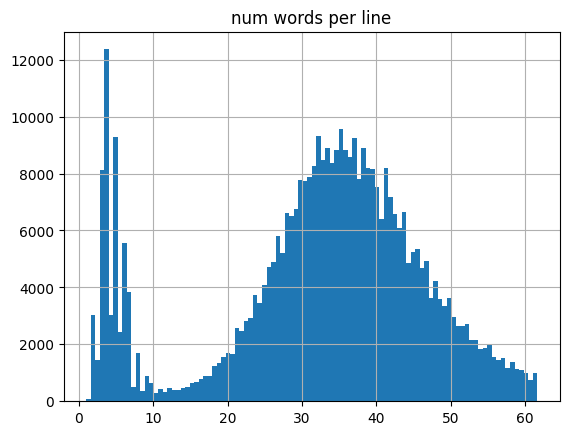

In [40]:

col = "num words per line"
df_art = df[df[col] < np.quantile(df[col], 0.95)]
df_art.boxplot(column=col)
df_art.hist(column=col, bins=100)

In [41]:

# num words per line
df_tmp = show_outlier_by_percentiles(df,col, 0.999, limit=2)
repr_content_mod = lambda art : art["url"] + "\n" + repr(art["content"]) + "\n---------------\n"
show_df_lines(df_tmp, file, repr_content_mod)

https://www.novinky.cz/krimi/418853-soud-zamitl-zadost-pirata-silnic-trpisovskeho-o-vraceni-ridicskeho-prukazu.html
'Soudce Ivo Zelinka v rámci dokazování totiž konstatoval, že i přes výzvu magistrátu Trpišovský stále ještě neodevzdal řidičský průkaz. Trpišovský to vysvětloval tím, že čtrnáct dní poté, co si vyslechl rozsudek, mu odcizili ve Francii na vánočních trzích peněženku. „Volal jsem tam, že jim ho nemůžu vrátit. Udělal jsem si nové doklady kromě řidičského průkazu,“ uvedl Trpišovský. „Přišel jsem o kreditní karty, řidičák, občanský průkaz, průkaz pojištěnce. To opravdu tak bylo,“ dodal. Na magistrátu mu údajně bylo řečeno, že ztrátu řidičského průkazu musí doložit.KOMENTÁŘ DNE: Vláda není polokomunistická - Argumentaci k povaze nové vlády s důvěrou analyzuje Jiří Pehe. Čtěte zde >>Zvítězí anglický lid, nebo EU – Britsko-unijní bitvu o brexit komentuje Alexander Tomský. Čtěte zde >> Soud ale nepřesvědčil. „Je zajímavé, že ve vztahu k ostatním dokladům byl schopen vyvinout přísl

In [42]:

df_tmp = show_outliers(df,col, 10, "lower", limit=2)
show_df_lines(df_tmp, file, repr_content_mod)

https://www.novinky.cz/zena/styl/clanek/jitka-obzinova-nejsem-samovladce-40235999
'Jste ve funkci pár dní. Už jste provedla nějaké změny?\nŘíkáte, že nechcete dělat okamžité změny, ale Mirka Čejková jako moderátorka skončila pár dní po vašem nástupu.\nTakže nejste příznivec revolucí?\nNejste samovládce, ale nálepka přísné šéfky vás provází.\nPrý jste chtěla převlékat moderátory zpráv. Je to pravda?\nA budete je převlékat?\nUž jste jako šéfka musela někdy přiznat omyl?\nNechybí vám, že nejste vidět na obrazovce?\nKdyž jste v 90. letech odjížděla jako válečná zpravodajka na Balkán, nechala jste se ostříhat na ježka. Chystáte i teď změnu image?\nCo vám zbylo na hlavě?\nStres zvládáte obdivuhodně. Máte to v genech, nebo vás to naučil život - třeba v Bosně?\nŠlo vám někdy o krk?\nMusela jste někdy svou hranici etiky překročit, když jste třeba moderovala zprávy?\nZaskočilo vás někdy něco v přímém přenosu?\nA co politické rozhovory? Ty vaše někdy připomínaly souboj.\nJak vzpomínáte na Slovens

In [76]:
max_urls_date = df.groupby("date")["url"].count().idxmax()
print(max_urls_date)

df_tmp = df[df["date"] == max_urls_date].sample(5)
show_df_lines(df_tmp, file, lambda x: x["url"])


2018-07-19
https://www.novinky.cz/ekonomika/305819-babis-poprel-koupi-vydavatele-blesku-a-sportu-za-ctyri-miliardy.html
https://www.novinky.cz/domaci/160425-rath-konstruktivni-opozice-se-hodi-leda-do-diktatur.html
https://www.novinky.cz/domaci/248615-kohout-se-citi-jako-disident-havel-a-zada-klause-o-milost.html
https://www.novinky.cz/zahranicni/evropa/330795-prestrelka-mezi-rusy-a-ukrajinci-si-vyzadala-mrtveho-na-obou-stranach.html
https://www.novinky.cz/zahranicni/evropa/442713-dala-jsem-facku-malemu-goebbelsovi-vzpomina-posledni-zijici-z-hitlerova-bunkru.html
